<a href="https://colab.research.google.com/github/Subhash-K45/python/blob/main/cyclone/cloneipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define your CNN model
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Create an ImageDataGenerator for data augmentation and normalization
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

# Specify the path to your dataset



In [ ]:
import os
import cv2 as cv
from PIL import Image

In [ ]:
size = 64
dataset = []
label = []

In [ ]:
x = os.listdir()
x

['.config',
 'cyclone_2.jpeg',
 'notcycloned_2.jpeg',
 'notcyloned_.jpeg',
 'cyclone_1.jpg',
 'cyclone.jpg',
 'notcycloned_1.png.crdownload',
 'notcycloned_3',
 'sample_data']

In [ ]:
dataset = []
label = []

for i in x:
    if i == 'notcycloned_2.jpeg' or i == 'notcycloned_.jpeg':
        image = cv.imread(i)
        print(image)
        image = Image.fromarray(image, "RGB")
        image = image.resize((size, size))
        dataset.append(image)
        label.append(0)
    elif i == 'cyclone_2.jpeg' or i == 'cyclone_1.jpg':
        image = cv.imread(i)
        image = Image.fromarray(image, "RGB")
        image = image.resize((size, size))
        dataset.append(image)
        label.append(1)

[[[ 51   5  11]
  [ 51   5  11]
  [ 51   5  11]
  ...
  [ 26  57  58]
  [ 28  59  60]
  [ 34  64  65]]

 [[ 51   5  11]
  [ 51   5  11]
  [ 51   5  11]
  ...
  [ 19  50  51]
  [ 23  54  55]
  [ 28  58  59]]

 [[ 51   5  11]
  [ 51   5  11]
  [ 51   5  11]
  ...
  [ 25  57  56]
  [ 29  61  60]
  [ 33  64  63]]

 ...

 [[192 244 251]
  [193 248 253]
  [194 249 252]
  ...
  [133 185 215]
  [125 176 208]
  [126 174 208]]

 [[195 247 254]
  [197 252 255]
  [198 253 255]
  ...
  [138 190 220]
  [143 194 226]
  [140 188 222]]

 [[197 249 255]
  [199 254 255]
  [199 254 255]
  ...
  [116 168 198]
  [135 186 218]
  [130 178 212]]]


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(dataset,label,test_size = 0.3,random_state = 42)

In [ ]:
X_train,X_test,y_train,y_test

([<PIL.Image.Image image mode=RGB size=64x64>,
  <PIL.Image.Image image mode=RGB size=64x64>],
 [<PIL.Image.Image image mode=RGB size=64x64>],
 [0, 1],
 [1])

In [ ]:
X_train_np = np.array([np.array(img) for img in X_train])
X_test_np = np.array([np.array(img) for img in X_test])
y_train_np = np.array(y_train)
y_test_np = np.array(y_test)

# Normalize pixel values to be between 0 and 1
X_train_np = X_train_np / 255.0
X_test_np = X_test_np / 255.0

# Define your CNN model
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Split the training set into training and validation sets
X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(
    X_train_np, y_train_np, test_size=0.2, random_state=42
)

# Train the model
history = model.fit(
    X_train_split,
    y_train_split,
    epochs=10,
    validation_data=(X_val_split, y_val_split)
)

# Evaluate on the test set
test_loss, test_acc = model.evaluate(X_test_np, y_test_np)
print(f'Test accuracy: {test_acc}')

Epoch 1/10
1/1 [==============================] - 2s 2s/step - loss: 0.7032 - accuracy: 0.0000e+00 - val_loss: 1.0628 - val_accuracy: 0.0000e+00
Epoch 2/10
1/1 [==============================] - 0s 64ms/step - loss: 0.4979 - accuracy: 1.0000 - val_loss: 1.9560 - val_accuracy: 0.0000e+00
Epoch 3/10
1/1 [==============================] - 0s 49ms/step - loss: 0.2748 - accuracy: 1.0000 - val_loss: 4.3153 - val_accuracy: 0.0000e+00
Epoch 4/10
1/1 [==============================] - 0s 50ms/step - loss: 0.0790 - accuracy: 1.0000 - val_loss: 8.9021 - val_accuracy: 0.0000e+00
Epoch 5/10
1/1 [==============================] - 0s 56ms/step - loss: 0.0084 - accuracy: 1.0000 - val_loss: 15.5535 - val_accuracy: 0.0000e+00
Epoch 6/10
1/1 [==============================] - 0s 75ms/step - loss: 3.7526e-04 - accuracy: 1.0000 - val_loss: 24.0542 - val_accuracy: 0.0000e+00
Epoch 7/10
1/1 [==============================] - 0s 56ms/step - loss: 8.1032e-06 - accuracy: 1.0000 - val_loss: 34.1088 - val_accurac

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
def sketch_cyclone_area(image_path):
    # Read the image
    image = cv2.imread(image_path)

    # Convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply GaussianBlur to reduce noise and help edge detection
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)

    # Use the Canny edge detector
    edges = cv2.Canny(blurred, 50, 150)

    # Find contours in the edged image
    contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Draw contours on the original image
    cv2.drawContours(image, contours, -1, (0, 255, 0), 2)

    # Display the result
    cv2_imshow(image)
    # cv2.waitKey(0)
    # cv2.destroyAllWindows()

# Replace 'your_image_path.jpg' with the path to your cyclone image
image_path = 'cyclone_1.jpg'
sketch_cyclone_area(image_path)

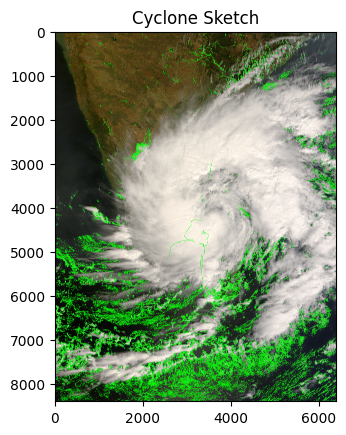

In [ ]:
import cv2
import matplotlib.pyplot as plt

def sketch_cyclone_area(image_path):
    # Read the image
    image = cv2.imread(image_path)

    if image is None:
        print(f"Error: Unable to read the image at {image_path}")
        return

    # Convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply GaussianBlur to reduce noise and help edge detection
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)

    # Use the Canny edge detector
    edges = cv2.Canny(blurred, 50, 150)

    # Find contours in the edged image
    contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Draw contours on the original image
    cv2.drawContours(image, contours, -1, (0, 255, 0), 2)

    # Display the result using matplotlib
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title('Cyclone Sketch')
    plt.show()

# Accept image path as user input
#image_path = input("Enter the path to your cyclone image: ")
sketch_cyclone_area('cyclone_1.jpg')


In [ ]:
from tensorflow.keras.preprocessing.image import load_img

In [ ]:
load_img('cyclone_1.jpg')

In [ ]:
 im = cv2.imread('cyclone_1.jpg')

In [ ]:
im

array([[[25, 58, 37],
        [24, 57, 36],
        [23, 56, 35],
        ...,
        [85, 86, 76],
        [85, 86, 76],
        [85, 86, 76]],

       [[25, 58, 37],
        [24, 57, 36],
        [23, 56, 35],
        ...,
        [85, 86, 76],
        [85, 86, 76],
        [84, 85, 75]],

       [[25, 58, 37],
        [24, 57, 36],
        [23, 56, 35],
        ...,
        [85, 86, 76],
        [84, 85, 75],
        [84, 85, 75]],

       ...,

       [[13, 13, 13],
        [11, 11, 11],
        [ 9,  9,  9],
        ...,
        [57, 49, 42],
        [69, 53, 47],
        [81, 55, 49]],

       [[13, 13, 13],
        [13, 13, 13],
        [12, 12, 12],
        ...,
        [34, 31, 23],
        [46, 33, 25],
        [57, 33, 27]],

       [[13, 13, 13],
        [14, 14, 14],
        [13, 13, 13],
        ...,
        [24, 30, 19],
        [39, 32, 23],
        [51, 33, 26]]], dtype=uint8)

In [ ]:
im.shape

(8400, 6400, 3)

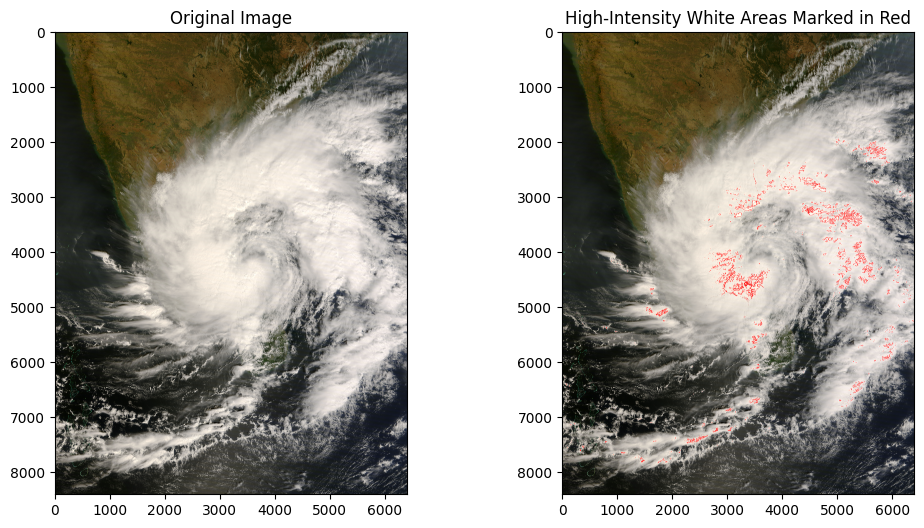

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read the image
image = cv2.imread('cyclone_1.jpg')

# Convert the image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Threshold the image to identify high-intensity white areas
_, thresholded = cv2.threshold(gray, 245, 255, cv2.THRESH_BINARY)

# Find contours in the thresholded image
contours, _ = cv2.findContours(thresholded, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Create a copy of the original image for marking
marked_image = image.copy()

# Draw contours on the marked image with red color
cv2.drawContours(marked_image, contours, -1, (0, 0, 255), 2)

# Display the original and marked images
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

axes[0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
axes[0].set_title('Original Image')

axes[1].imshow(cv2.cvtColor(marked_image, cv2.COLOR_BGR2RGB))
axes[1].set_title('High-Intensity White Areas Marked in Red')

plt.show()


In [ ]:
!pip install rasterio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.6/20.6 MB 51.8 MB/s eta 0:00:00


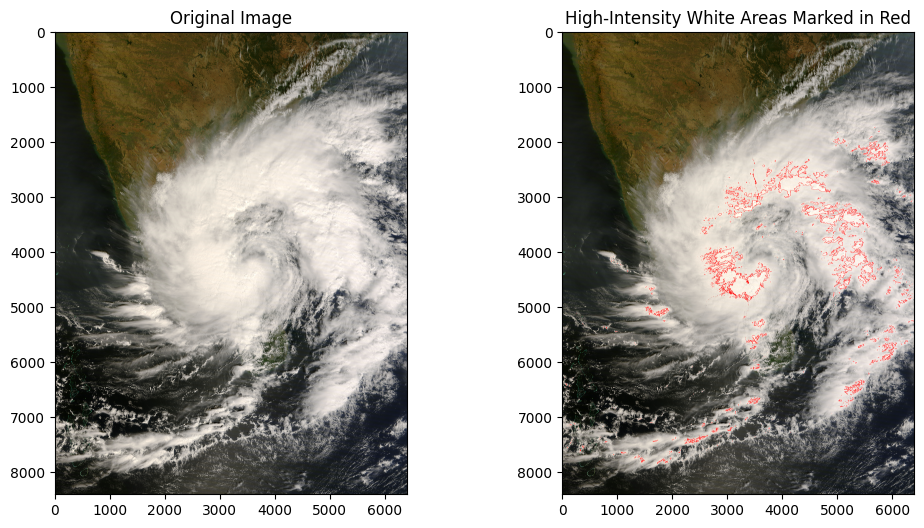

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import rasterio
from rasterio.transform import from_origin

# Read the image
image = cv2.imread('cyclone_1.jpg')

# Assume you have georeferencing information (modify as per your data)
# For example purposes, I'm creating a simple georeferencing transform
transform = from_origin(0, 100, 1, 1)

# Convert pixel coordinates to geographic coordinates
def pixel_to_geo(x, y):
    lon, lat = transform * (x, y)
    return lat, lon

# Use this function to convert contour coordinates to geographic coordinates
def contours_to_geo(contours):
    geo_contours = []
    for contour in contours:
        geo_contour = [pixel_to_geo(x, y) for x, y in contour[:, 0]]
        geo_contours.append(geo_contour)
    return geo_contours

# Your existing code for finding contours
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
_, thresholded = cv2.threshold(gray, 240, 255, cv2.THRESH_BINARY)
contours, _ = cv2.findContours(thresholded, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Convert contours to geographic coordinates
geo_contours = contours_to_geo(contours)

# Create a copy of the original image for marking
marked_image = image.copy()

# Draw contours on the marked image with red color
cv2.drawContours(marked_image, contours, -1, (0, 0, 255), 2)

# Display the original and marked images
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
axes[0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
axes[0].set_title('Original Image')
axes[1].imshow(cv2.cvtColor(marked_image, cv2.COLOR_BGR2RGB))
axes[1].set_title('High-Intensity White Areas Marked in Red')
plt.show()


In [ ]:
geo_contours

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read the image
image = cv2.imread('cyclone_1.jpg')

# Define intensity ranges
intensity_ranges = {
    (240, 240, 240): (240, 245),
    (245, 245, 245): (245, 250),
    (250, 250, 250): (250, 255),
}

# Initialize a dictionary to store counts for each intensity range
intensity_counts = {}

# Iterate through the intensity ranges and count pixels within each range
for rgb_value, intensity_range in intensity_ranges.items():
    lower_bound, upper_bound = intensity_range
    mask = np.all((image[:, :, :3] >= np.array(rgb_value)) & (image[:, :, :3] <= np.array((upper_bound, upper_bound, upper_bound))), axis=2)
    count = np.sum(mask)
    intensity_counts[rgb_value] = count

# Display the counts for each intensity range
for rgb_value, count in intensity_counts.items():
    print(f'Count in range {rgb_value} : {count} pixels')


Count in range (240, 240, 240) : 2 pixels
Count in range (245, 245, 245) : 11 pixels
Count in range (250, 250, 250) : 7537 pixels
